In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ntrarogyaseva.csv')
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

In [4]:
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [5]:
data['SEX'].replace('FEMALE','Female',inplace=True)
data['SEX'].replace('MALE','Male',inplace=True)
data['SEX'].replace('Male(Child)','Male',inplace=True)
data['SEX'].replace('Female(Child)','Female',inplace=True)
data['AGE'] = data['AGE'].astype(int)
data.SEX.value_counts()

Male      285795
Female    193893
Name: SEX, dtype: int64

# Veri Görselleştirme

### ! Görselleştirilmiş veriler ve analizleri ekte bulunan pdf dosyasında verilmiştir !

## Yaş

In [6]:
data['AGE'].describe()

count    479688.000000
mean         44.912264
std          18.961084
min           0.000000
25%          34.000000
50%          47.000000
75%          59.000000
max         107.000000
Name: AGE, dtype: float64

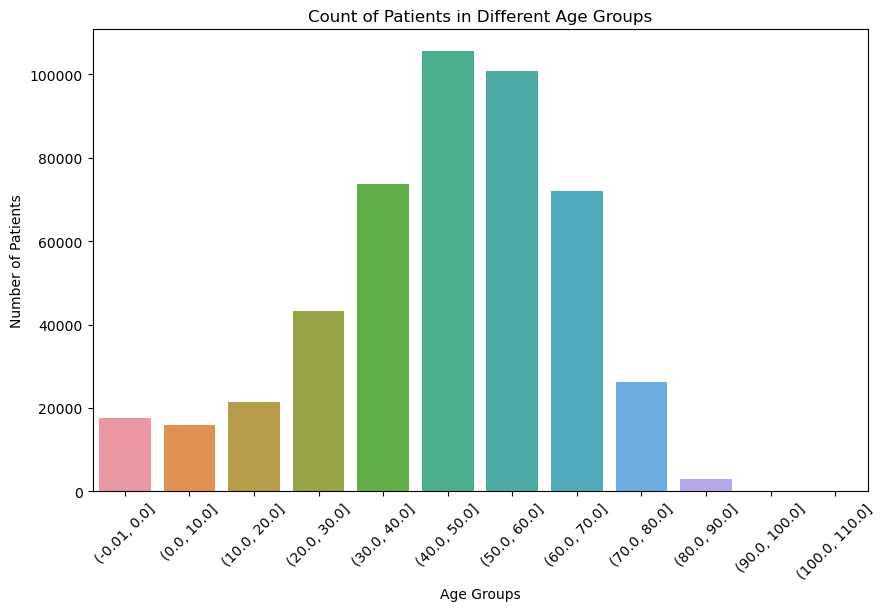

In [37]:
age_groups = [-0.01, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100,110]


data['AGE_GROUP'] = pd.cut(data['AGE'], age_groups)
age_group_counts = data['AGE_GROUP'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AGE_GROUP')
plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.title('Count of Patients in Different Age Groups')
plt.xticks(rotation=45)

plt.show()

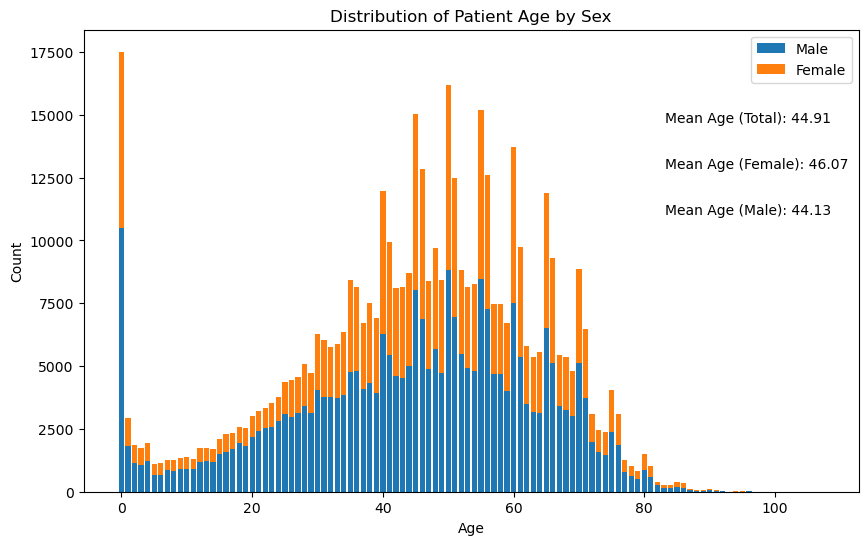

In [38]:
mean_age_total = data['AGE'].mean()
mean_age_female = data[data['SEX'] == 'Female']['AGE'].mean()
mean_age_male = data[data['SEX'] == 'Male']['AGE'].mean()

male_data = data[data['SEX'] == 'Male']
female_data = data[data['SEX'] == 'Female']

male_age_counts = male_data['AGE'].value_counts().sort_index()
female_age_counts = female_data['AGE'].value_counts().sort_index()

all_age_groups = sorted(set(male_age_counts.index) | set(female_age_counts.index))
male_age_counts = male_age_counts.reindex(all_age_groups).fillna(0)
female_age_counts = female_age_counts.reindex(all_age_groups).fillna(0)

plt.figure(figsize=(10, 6))
plt.bar(all_age_groups, male_age_counts, label='Male')
plt.bar(all_age_groups, female_age_counts, bottom=male_age_counts, label='Female')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Patient Age by Sex')
plt.legend()

plt.text(0.75, 0.8, f'Mean Age (Total): {mean_age_total:.2f}', transform=plt.gca().transAxes)
plt.text(0.75, 0.7, f'Mean Age (Female): {mean_age_female:.2f}', transform=plt.gca().transAxes)
plt.text(0.75, 0.6, f'Mean Age (Male): {mean_age_male:.2f}', transform=plt.gca().transAxes)

plt.show()


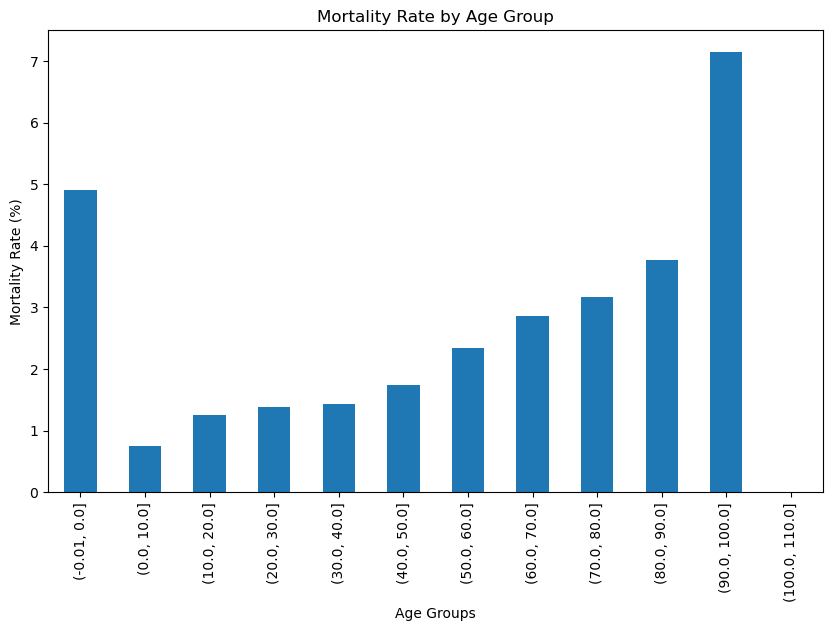

In [39]:
data = data.dropna(subset=['AGE_GROUP', 'Mortality Y / N'])

data['Mortality(1/0)'] = data['Mortality Y / N'].map({'YES': 1, 'NO': 0})

age_group_mortality = data.groupby('AGE_GROUP')['Mortality(1/0)'].mean() * 100

plt.figure(figsize=(10, 6))
age_group_mortality.plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate by Age Group')
plt.show()

## Cinsiyet

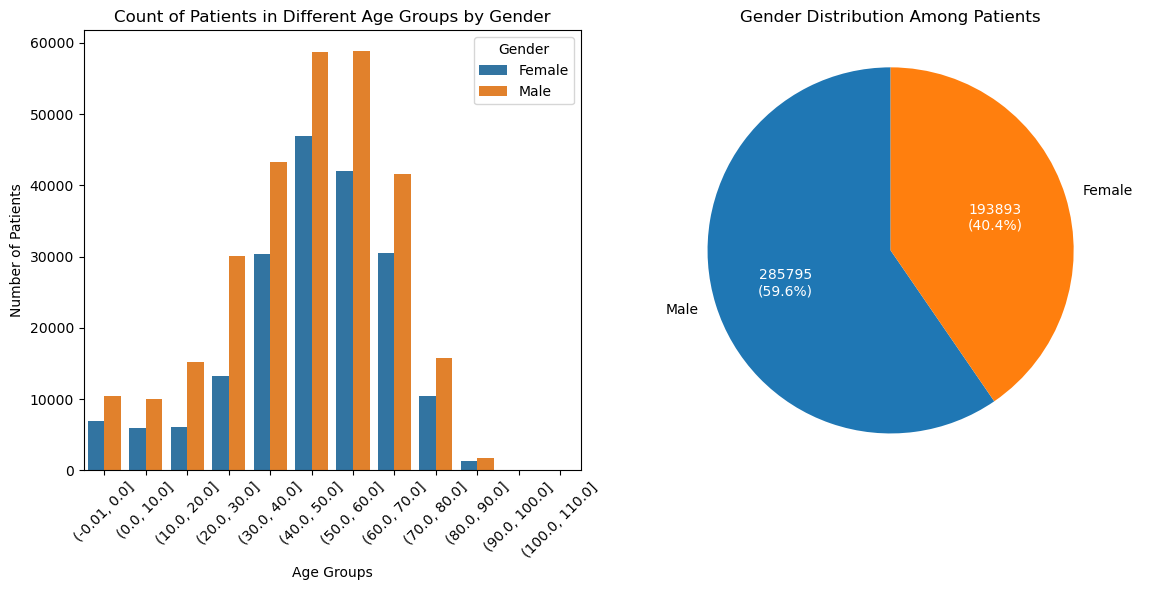

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=data, x='AGE_GROUP', hue='SEX', ax=ax1)
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Count of Patients in Different Age Groups by Gender')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Gender')

gender_counts = data['SEX'].value_counts()

wedges, _, autotexts = ax2.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
ax2.set_title('Gender Distribution Among Patients')
ax2.axis('equal') 

for i, autotext in enumerate(autotexts):
    count = gender_counts[i]
    autotext.set_text(f'{count}\n({autotext.get_text()})')
    
for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.show()


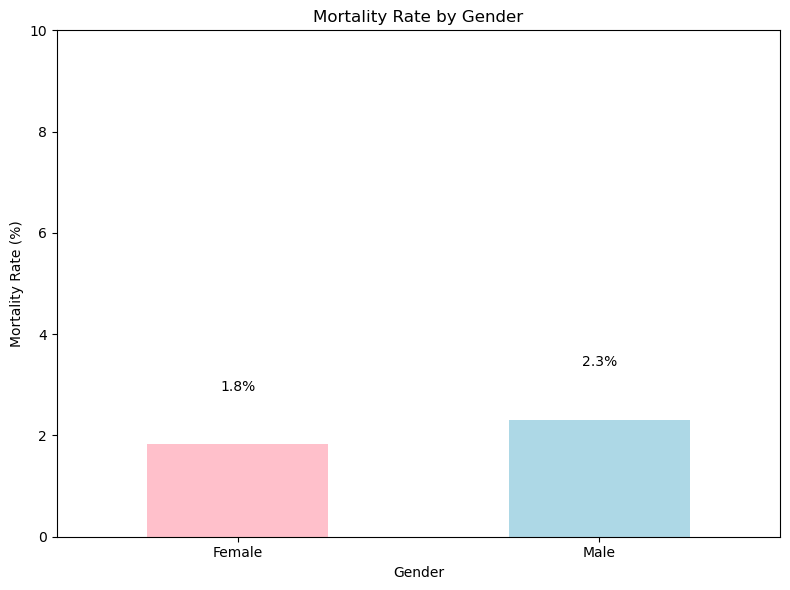

In [41]:
mortality_rate = data.groupby('SEX')['Mortality(1/0)'].mean() * 100

plt.figure(figsize=(8, 6))
mortality_rate.plot(kind='bar', color=['pink', 'lightblue'])
plt.xlabel('Gender')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate by Gender')
plt.xticks(rotation=0)
plt.ylim([0, 10])

for i, rate in enumerate(mortality_rate):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Kast Sınıfları

In [14]:
data['CASTE_NAME'].value_counts()

BC            246164
OC            114123
SC             76742
Minorities     29150
ST             13138
Others           371
Name: CASTE_NAME, dtype: int64

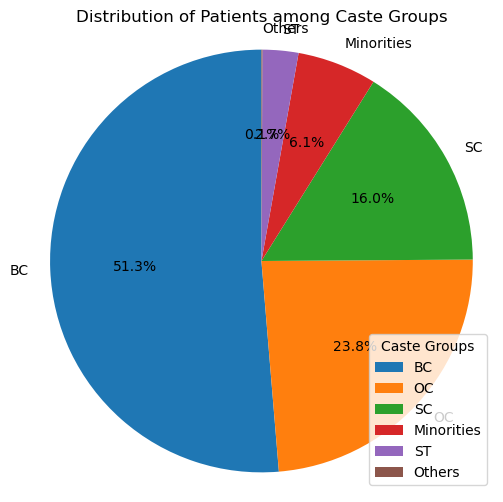

In [43]:
data = data.dropna(subset=['CASTE_NAME'])

caste_counts = data['CASTE_NAME'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(caste_counts, labels=caste_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patients among Caste Groups')
plt.axis('equal')  # Ensure that pie is drawn as a circle

plt.legend(title='Caste Groups',loc='best')

plt.show()


<Figure size 1200x600 with 0 Axes>

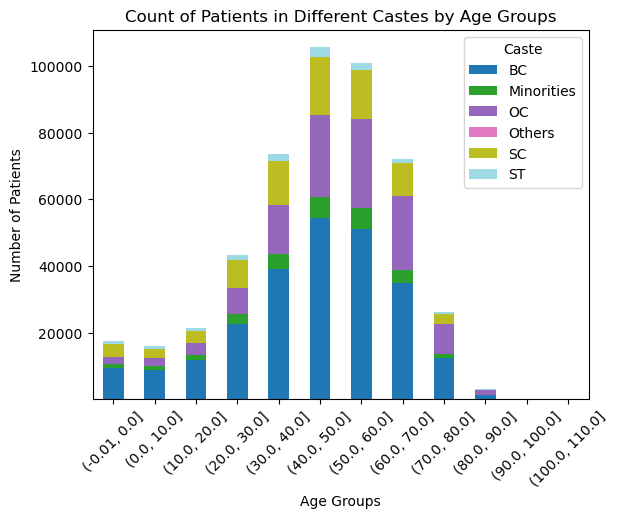

In [44]:
age_group_caste_counts = data.groupby(['AGE_GROUP', 'CASTE_NAME']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
age_group_caste_counts.plot(kind='bar', stacked=True, cmap='tab20')

plt.xlabel('Age Groups')
plt.ylabel('Number of Patients')
plt.title('Count of Patients in Different Castes by Age Groups')

plt.legend(title='Caste')
plt.xticks(rotation=45)

plt.show()


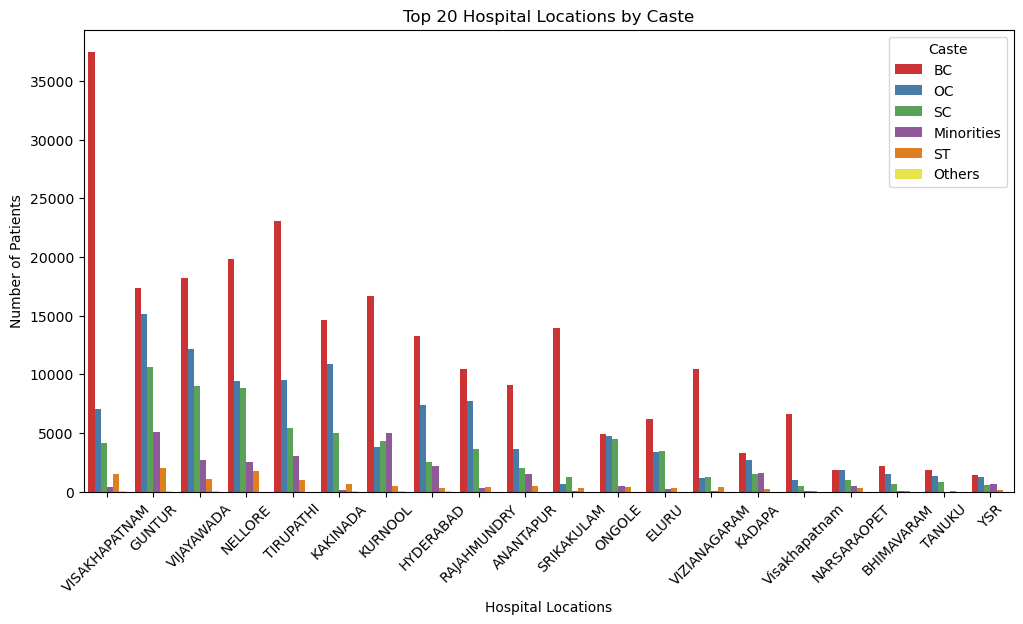

In [45]:
data = data.dropna(subset=['HOSP_LOCATION', 'CASTE_NAME'])
location_counts = data['HOSP_LOCATION'].value_counts()

top_locations = location_counts.nlargest(20)

plt.figure(figsize=(12, 6))
data_subset = data[data['HOSP_LOCATION'].isin(top_locations.index)]
ax = sns.countplot(data=data_subset, x='HOSP_LOCATION', hue='CASTE_NAME', palette='Set1', order=top_locations.index)

plt.xlabel('Hospital Locations')
plt.ylabel('Number of Patients')
plt.title('Top 20 Hospital Locations by Caste')

ax.tick_params(axis='x', rotation=45)

plt.legend(title='Caste')
plt.show()


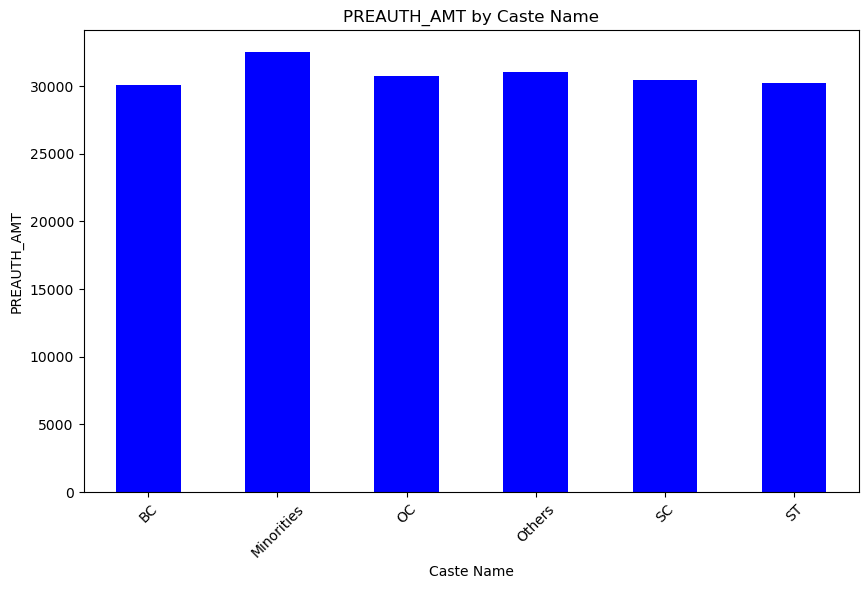

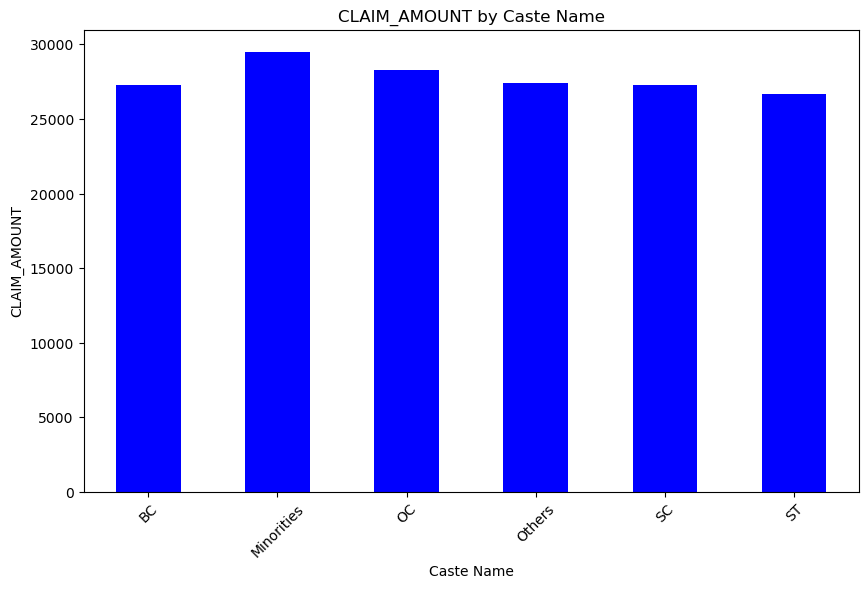

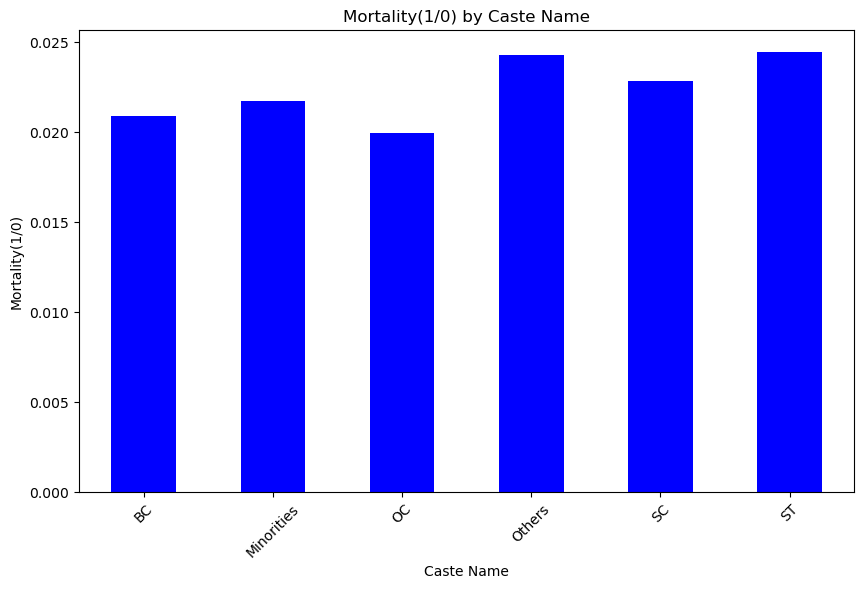

In [46]:
comparison_columns = ['PREAUTH_AMT', 'CLAIM_AMOUNT', 'Mortality(1/0)']

data_subset = data[['CASTE_NAME'] + comparison_columns].dropna()

for column in comparison_columns:
    comparison_data = data_subset.groupby('CASTE_NAME')[column].mean()
    
    plt.figure(figsize=(10, 6))
    comparison_data.plot(kind='bar', color='blue')
    plt.xlabel('Caste Name')
    plt.ylabel(column)
    plt.title(f'{column} by Caste Name')
    plt.xticks(rotation=45)
    
    plt.show()

## Kategoriler ve Ameliyatlar

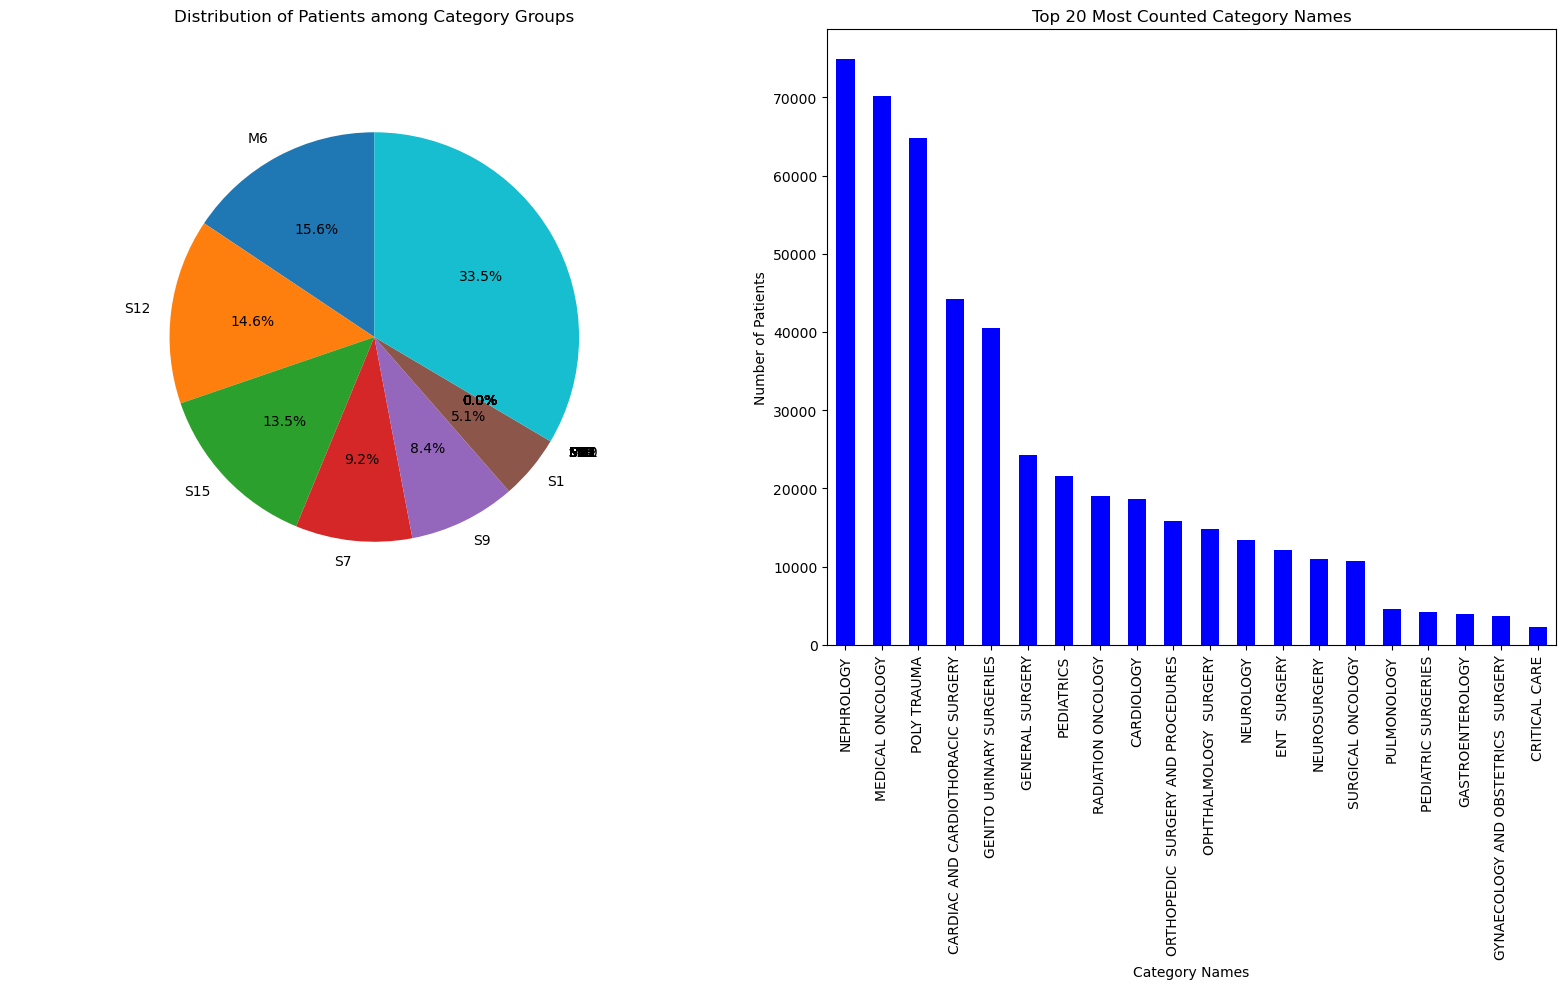

In [47]:
category_counts = data['CATEGORY_CODE'].value_counts()

category_percentages = category_counts / category_counts.sum()

threshold = 0.05

# Identify categories with percentages below the threshold
minority_categories = category_percentages[category_percentages < threshold]

# Combine minority categories into 'Others'
category_counts_combined = category_counts.copy()
category_counts_combined.loc[minority_categories.index] = 0
other_count = category_counts.loc[minority_categories.index].sum()
category_counts_combined['Others'] = other_count

category_labels = category_counts_combined.index.tolist()
category_labels[-1] = ''

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.pie(category_counts_combined, labels=category_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patients among Category Groups')
plt.axis('equal')  # Ensure that pie is drawn as a circle


top_categories = data['CATEGORY_NAME'].value_counts().nlargest(20)
plt.subplot(1, 2, 2)
top_categories.plot(kind='bar', color='blue')
plt.xlabel('Category Names')
plt.ylabel('Number of Patients')
plt.title('Top 20 Most Counted Category Names')

plt.tight_layout()
plt.show()


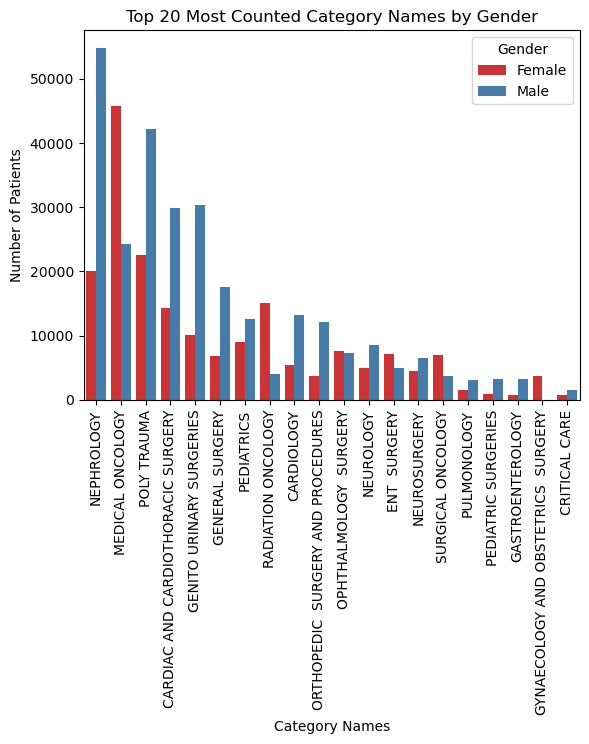

In [48]:
top_categories = data['CATEGORY_NAME'].value_counts().nlargest(20)
sns.countplot(data=data, x='CATEGORY_NAME', hue='SEX', order=top_categories.index, palette='Set1')
plt.xlabel('Category Names')
plt.ylabel('Number of Patients')
plt.title('Top 20 Most Counted Category Names by Gender')
plt.tick_params(axis='x', rotation=90)
plt.legend(title='Gender')

plt.show()


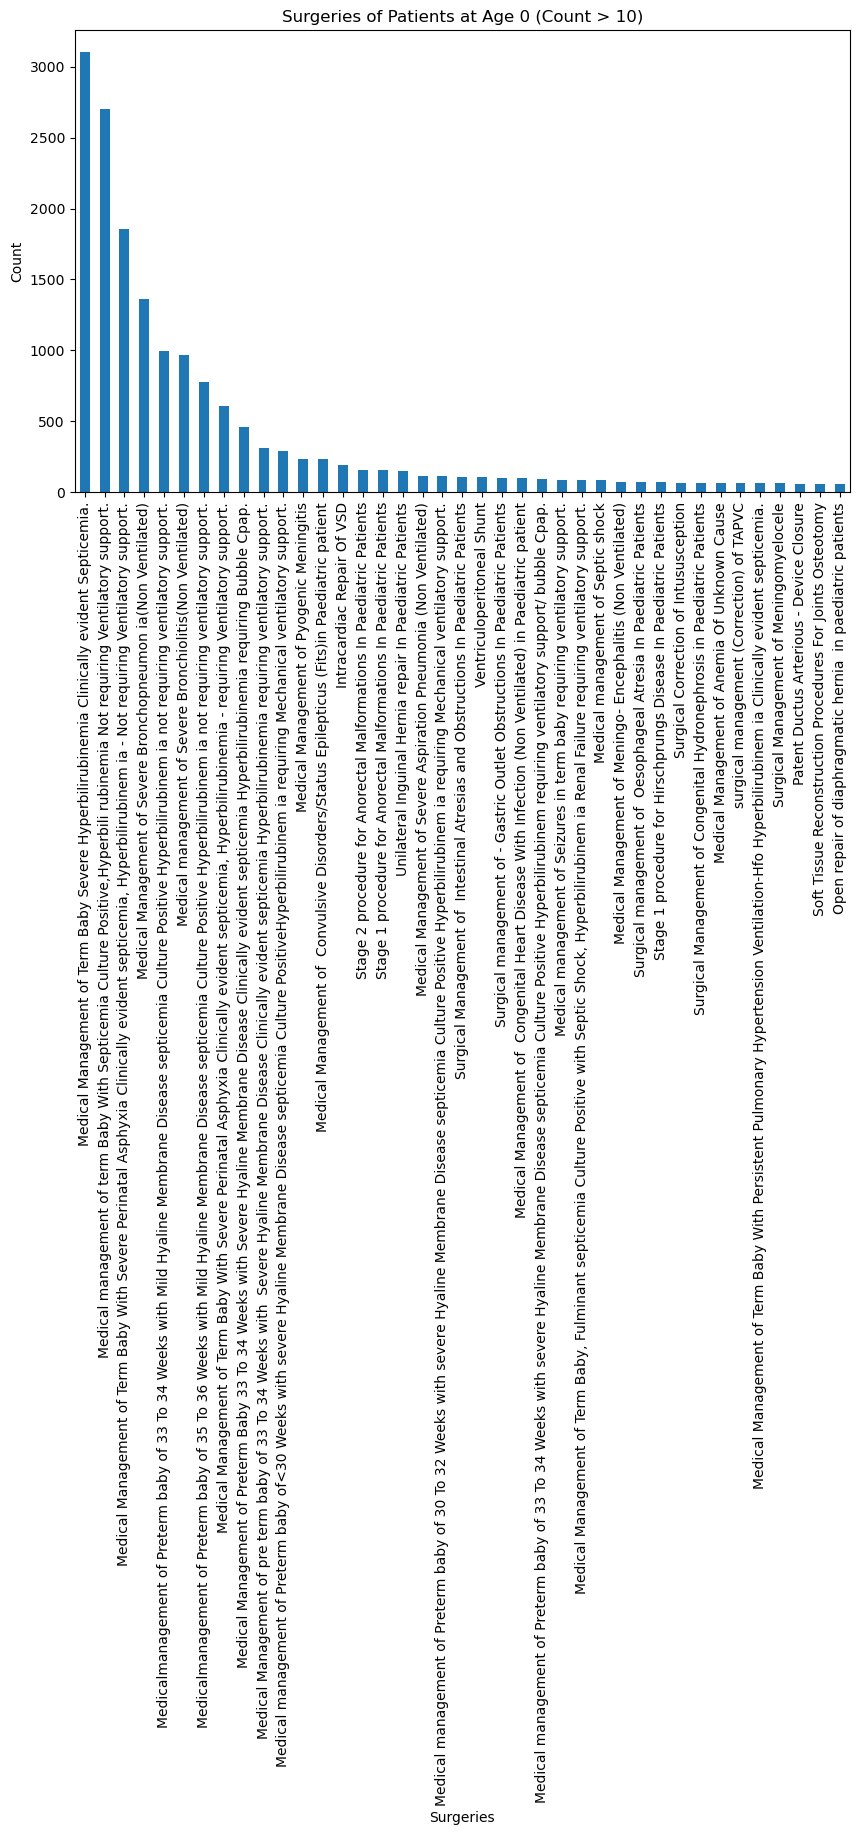

In [21]:
age_0_data = data[data['AGE'] == 0]

surgery_counts = age_0_data['SURGERY'].value_counts()

surgery_counts_filtered = surgery_counts[surgery_counts > 50]

plt.figure(figsize=(10, 6))
surgery_counts_filtered.plot(kind='bar')
plt.xlabel('Surgeries')
plt.ylabel('Count')
plt.title('Surgeries of Patients at Age 0 (Count > 10)')

plt.xticks(rotation=90)
plt.show()


# Ölüm Oranları

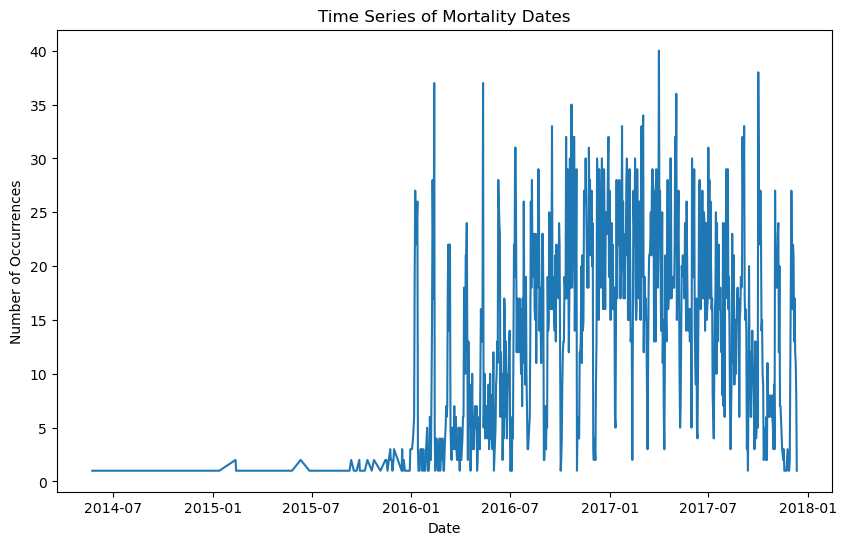

In [27]:
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])
mortality_counts = data['MORTALITY_DATE'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(mortality_counts.index, mortality_counts.values)

plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.title('Time Series of Mortality Dates')

plt.show()


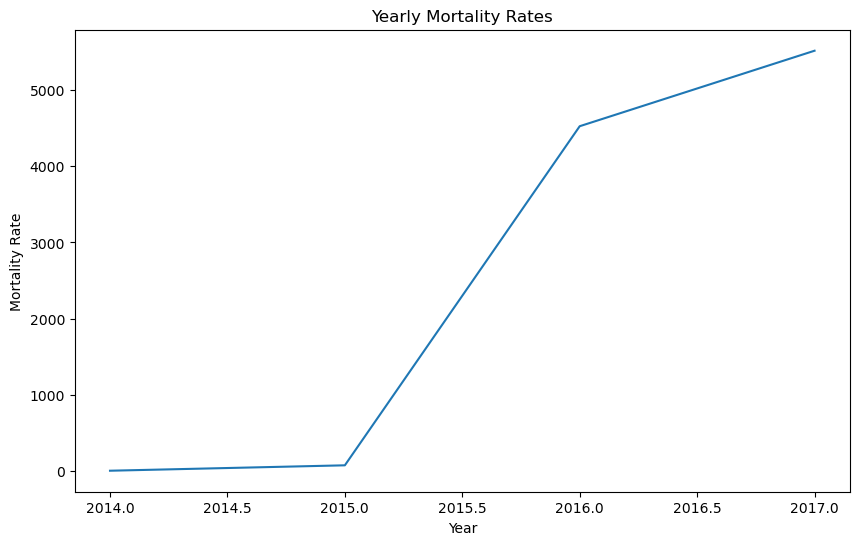

In [30]:
data['Year'] = data['MORTALITY_DATE'].dt.year

yearly_mortality_rates = data.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(yearly_mortality_rates.index, yearly_mortality_rates.values)

plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.title('Yearly Mortality Rates')

plt.show()

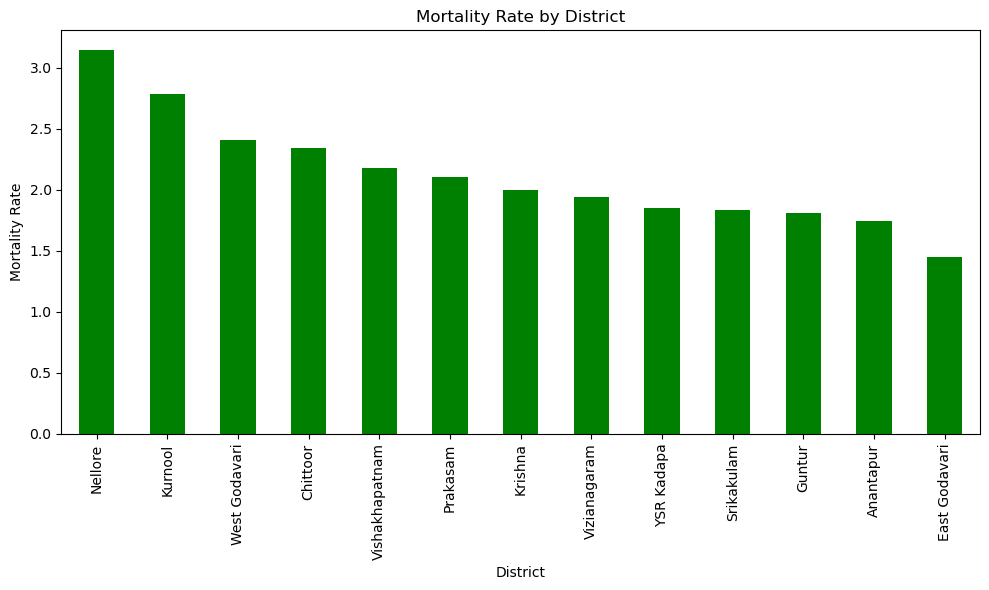

In [49]:
mortality_rates = data.groupby('DISTRICT_NAME')['Mortality(1/0)'].mean()

mortality_rates = mortality_rates.sort_values(ascending=False) *100

plt.figure(figsize=(10, 6))
mortality_rates.plot(kind='bar',color='green')

plt.xlabel('District')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate by District')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()